# Measurements and their uncertainty


## Pre/Post-test<a class="anchor" id="section_1_0"></a>
This test is for testing your current skills in Python. You can use it in two ways:
* pre-test: to test your skills beforehand. If you are already proficient in Python, and can do this test within approximately 15 minutes, you can scan through the notebook rather than carfefully reading each sentence.
* post-test: test your skills after Notebook 6. Check whether you learned enough.

**Diode**

In an experiment 10 measurements were taken of the voltage over and current through a Si-diode. The results are displayed in the following table together with their uncertainties:

| I (μA) | $\alpha_I$ (μA)| V (mV)| $\alpha_V$ (mV)| 
| ---   | ---     | ---   | --- |
|3034 |4      | 670   | 4   |        
|1494 |2      | 636   | 4   |       
|756.1 |0.8     |604    | 4   |    
|384.9 |0.4     | 572   | 4   |      
|199.5 |0.3     | 541   | 4   |    
|100.6 |0.2     | 505   | 4   |     
|39.93 |0.05    | 465   | 3   |     
|20.11 |0.03    | 432   | 3   |     
|10.23 |0.02    | 400   | 3   |     
|5.00  |0.01    | 365   | 3   |  
|2.556  |0.008    | 331   | 3   |    
|1.269  |0.007    | 296   | 2   |    
|0.601  |0.007    |257    | 2   |
|0.295  |0.006    |221    | 2   |
|0.137  |0.006    |181    | 2   |
|0.067  |0.006    |145    | 2   |


The diode is expected to behave according to the following relation: $I = a(e^{bV}-1)$, where $a$ and $b$ are unknown constants. 

**Exercise:** Use the curve_fit function to determine whether this is a valid model to describe the dataset. Is the found parameter $a$ in agreement with the value found in another experiment $a_{2} = 2.0 \pm 0.5 \mathrm{nA}$?

*Hint: use a logscale on the y-axis*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

I = np.array([3034,1494,756.1,384.9,199.5,100.6,39.93,20.11,10.23,5.00,2.556,1.269,0.601,0.295,0.137,0.067])*1e-6
a_I = np.array([4,2,0.8,0.4,0.3,0.2,0.05,0.03,0.02,0.01,0.008,0.007,0.007,0.006,0.006,0.006])*1e-6
V = np.array([670,636,604,572,541,505,465,432,400,365,331,296,257,221,181,145])*1e-3
a_V = np.array([4,4,4,4,4,4,3,3,3,3,3,2,2,2,2,2])*1e-3


<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/NB-XHEe4KJc?si=9hoihugVfJ9qpnLG"
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>

## Learning objectives<a class="anchor" id="section_6_0"></a>

Now that we know how to do some basic Python, it is time to use it to understand features and the nature of physical measurements. 

In this notebook, we will introduce you to measurements, variance in repeated measurements, and measurement uncertainties. If we do calculations with a value with an uncertainty, we end up with an answer that has an uncertainty as well... But how do we calculate this uncertainty? Moreover, we often do not calculate a value on a single set of repeated measurements but rather on datasets with various mean values of repeated measurements. How do we properly analyse these data? For each topic, a summary is given. What is new, compared to the previous notebooks, is that we have * assignments. These are not mandatory, but can be made to help you improve your knowledge of Python and data-analysis.

Now that we know how to do some basic Python, it is time to use it to understand features of physical measurements. It is very useful to study the chapter in the online manual as well!

After completing this notebook, you are able to:
* calculate the mean, standard deviation and uncertainty of a dataset
* report findings using the scientific conventions
* understand and use Gaussian and Poisson distribution
* identify outliers
* carry out an agreement analysis
* calculate how uncertainties propagate when calculations are performed


## Introduction

In physics experiments, you try to record relationships or certain values as accurately as possible. What exactly “as accurately as possible” means remains unclear for now. What is hopefully clear right away is that we can almost never determine those values directly. We conduct various experiments to collect data that we can use to determine the relationship and then establish the various parameters in that relationship as accurately as possible. 

However, it is never possible to determine the exact value(s) of those parameters: with each new measurement, there will be small fluctuations (especially if you measure very precisely). Over time, we have been able to improve our experiments and take more measurements in less time. This means that, over the course of history, constants such as Planck's constant have been determined with increasing accuracy and that the value has varied over the years.

The consequence of never being able to determine a value precisely is that when you work with that value, your final answer will never be perfect (determined). There will always be uncertainty about what the exact value actually is. In this chapter, you will learn how the uncertainty in a measured value affects the final answer (you already know the basics, significant figures and associated calculation rules), and how to minimize that uncertainty.

```{note}
The terms measurement error and measurement uncertainty are often used interchangeably. In many cases, measurement uncertainty would be a more accurate description of what is meant. A measurement error implies that you are doing something truly *wrong*, without being able to do anything about it. The error arises inherently from the use of an instrument, from the measurement itself. In that case, it would be more accurate to talk about uncertainty. Although we try to make a careful distinction here, in general language use the two terms are often unintentionally interchanged. 

```

## Goal

A complete data analysis will often consist of the following three phases:

1.  determining the reliability of individual measurements and the dataset as a whole;
2.  finding and determining the pattern in the data, including determining the variables with their associated uncertainties;
3.  an optimal data (re)presentation to convince of phases 1 & 2.

The aim of this part of the physics practical is to develop a deeper understanding of the above phases and to learn how to apply the associated techniques.


## Quantities, units, dimension-analysis and constants

In physics, we measure physical quantities. We distinguish between vectors (quantities with a direction $\vec{F}$ (N)) and scalars (quantities with only a value ($m (\mathrm{kg})$)). The quantity is written in italics ($U$), with the corresponding unit in upright type ($\mathrm{V}$).

There are five commonly used standard units ($\mathrm{kg, m, s, K, C}$). There is also a sixth standard unit that you encounter less often ($\mathrm{cd}$). All other units are derived from these standard units. The derivation of the unit is based on the formula:

```{admonition} Example: Derivation of J/s
:class: dropdown, tip
$P = F\cdot v$\
$[\mathrm{J/s}] = [\mathrm{kg m s}^{-2}] \cdot [\mathrm{m s}^{-1}] = [\mathrm{kg m}^{2} \mathrm{s}^{-3}]$
```

In the same way, based on units (dimensional analysis), you can derive formulas if you know which quantities may play a role. This will be discussed in much greater depth in the second-year course Physical Transport Phenomena. Would you like to know how to perform a dimensional analysis? Then take a look at this video:

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/3gxNrc_EEN8?si=1Q2koWQ5TVjOf9Ew"
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>

In many experiments in which you determine a relationship, you use a constant, such as Planck's constant. [CODATA](https://codata.org/blog/2015/08/04/codata-recommended-values-of-the-fundamental-physical-constants-2014/) has compiled a useful list of these constants with their corresponding (relative) uncertainty. Use this reference when looking up and using physical constants.

```{exercise}
:label: ex-eenh
:class: dropdown
Provided the equation $F=k \cdot v^2$, what is the unit of $k$ expressed SI-units (kg,m,s,C,K)?
```

````{solution} ex-eenh
:class: dropdown
$F = k \cdot v^2 $

$[\mathrm{kg} \frac{\mathrm{m}}{\mathrm{s}^2}] = [..] \cdot [\frac{\mathrm{m}^2}{\mathrm{s}^2}]$

$k → [\frac{\mathrm{kg}}{\mathrm{m}}]$

````

## Errors and uncertainties in experimental physics

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/8uj8rbIQlus?si=OW5ZNdMhItTXxwXa"
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>

Every measurement of a physical quantity comes with a certain degree of uncertainty. This is simply because the act of measuring influences what you are measuring. Two examples of this are given in {numref}`Figure {number} <fig:MO:elekc>` and {numref}`Figure {number} <fig:MO:vent>`. Placing a voltmeter in an electrical circuit inherently changes the original electrical circuit. Placing a pressure gauge (Venturi tube) in a liquid flow influences the original setup and thus the liquid flow.

```{figure} Figures/beinvloeding_meting.png
---
width: 60%
name: fig:MO:elekc
---
Measuring voltage already changes the electric ciruit itself.
```

```{figure} Figures/venturi.png
---
width: 80%
name: fig:MO:vent
---
Placing pressure gauges in a liquid flow affects the original flow.
```

### Systematic error

In addition to influencing the measurement of your physical quantity by measuring it, there are other causes that can lead to ‘errors’. We distinguish between *systematic errors* and *random errors*. A systematic error will always be the same size, and therefore causes a deviation in your average result. Such an error strongly influences your final result. Fortunately, you can correct for this. Examples of systematic errors are a zero point error and a calibration error, see for example {numref}`Figure {number} <fig:MO:sysfout>`.

```{figure} Figures/Meetfout.png
---
width: 70%
name: fig:MO:sysfout
---
This creates a systematic error if you are not aware that the ruler does not start at 0.
```

To find out whether there is a systematic error in your data, you can check this using Python, for example. This is best explained using an example.

```{admonition} Example: Systematische error
:class: dropdown, tip
You are conducting research into the influence of distance on force. To do this, you measure the distance, but you are concerned that there may be a systematic error in the mutual distance $r$ because that distance cannot be measured accurately. If you investigate the expected relationship $F = \frac{a}{r^4}$, you can try to fit the function $F = \frac{a}{(r+\Delta r)^4}$. In the ideal situation, without systematic error, $\Delta r$ is equal to 0. If this produces a better fit for $\Delta r \neq 0$ ({numref}`Figure {number} <fig:systematic_error_fit>`), then $\Delta r$ may be your systematic error. Of course, you then need to investigate whether this value is reasonable and can be explained.
```

In {numref}`Figure {number} <fig:systematic_error_fit>`, you can see the difference between a fit with and without compensation for systematic error. Although the upper figure appears to be a good fit, you can see that the fit in the lower figure is even better across all measurements. Later, we will look at how we can investigate such errors more systematically.

```{figure} Figures/quad_without.png
---
width: 80%
name: fig:systematic_error_fit
---
Least-squares curve fit without correction for the systematic error: $F = \frac{a}{r^4}$
```

```{figure} Figures/quad_with.png
---
width: 80%
name: fig:MO:systematic_error_fit_2
---
Least-squares fit with correction for the systematic error: $F = \frac{a}{(r+\Delta r)^4}$ It is clear that the curve fits with all data.
```

### Random error

A random measurement error can arise due to, for example, temperature fluctuations, vibrations, air currents, collisions at the molecular level, etc. This is referred to as a *technical* random error. These uncertainties cannot always be reduced. Random errors can be both positive and negative, and therefore average out if you take enough measurements. You can work with them and calculate them because they are based on a probability distribution. In the following sections, we assume that you are always dealing with a random error, i.e., an error that is not correlated with other variables and for which the probability of that error occurring is *normally (Gaussian) distributed*.

In addition to technical random errors, you may encounter fundamental errors due to physical limitations on some measurements, for example due to [thermal fluctuations](https://en.wikipedia.org/wiki/Johnson%E2%80%93Nyquist_noise) when measuring currents. This is referred to as a *fundamental* random error. This contribution to the measurement uncertainty cannot be reduced. The contribution to the total uncertainty can be either positive or negative.

### Instrumental uncertainties

Every instrument you use has certain limitations. The uncertainty may lie in reading the instrument, but also in the instrument itself, and then also in the value of the measured quantity. In addition, you must first calibrate (some) instruments before using them. An error in calibration can lead to a systematic error.

When using instruments, the terms *precision* and *accuracy* are often used. Precision refers to the small spread in the measurements. Precision is closely related to random errors. Accuracy refers to how close the measurements are to the desired value. Accuracy is closely related to systematic errors. The four variants that you can have are shown in {numref}`Figure {number} <fig:MO:precision>`.

```{figure} Figures/precision.png
---
width: 80%
name: fig:MO:precision
---
The four variants concerning accuracy and precision. Accuracy is strongly linked to systematic errors, precision to random errors.
```

```{admonition} Measuring scales 
:class: dropdown, note

Different measuring instruments have different measuring scales. We distinguish between nominal, ordinal, interval, ratio, and cardinal scales.

**1. Nominal scale**\
If we only name the quality of the object, the measuring scale is called nominal. Determining the color of a solution is an example of this.

**2. Ordinal scale**\
If the designation involves a ranking, we refer to an ordinal scale. An example is giving grades for academic performance. Someone with a 10 knows more than someone with a 5, but that person does not know twice as much. Also, the difference in knowledge between a 5 and a 6 is usually incomparable to the difference between a 9 and a 10.

**3. Interval scale**\
A scale on which equal differences mean the same thing but ratios do not is called an interval scale. On an interval scale, the zero point is arbitrary. The Celsius scale is an example of this. 100 ˚C is not twice as high a temperature as 50 ˚C, but the temperature difference between 50 ˚C and 51 ˚C is the same as between 100 ˚C and 101 ˚C.


**4. Ratio scale**\
If, in addition to differences, we can also use ratios of measurement results in a meaningful way, then the measurement takes place on a ratio scale. Measuring lengths is an example. A table that is 2 m wide is twice as wide as a table that is 1 m wide. We strive to bring measurement to the level of a ratio scale. An example is the transition from the Celsius scale to the absolute temperature scale (the Kelvin scale).

**5. Cardinal scale**\
The fact that we can measure on an interval scale with a fixed zero point or on a ratio scale does not determine the numerical values. Only when we have chosen the unit (for Celsius temperatures the ˚C, for lengths for example the meter) can we assign numerical values. We then speak of a cardinal scale.
```

**Measurement uncertainty in analog instruments**\
With analog instruments, you have to read the value, see {numref}`Figure {number} <fig:MO:aflezen>`. In some cases, there is a mirror behind the pointer so that you don't make a mistake by reading the pointer at an angle. In addition, you cannot read the value with infinite precision. Think of a measuring stick that allows you to measure accurately to the nearest millimeter, but where distances between millimeters cannot be determined accurately, especially when the lines on the ruler are thick. When reading an analog meter, you must estimate the associated uncertainty:
* Read the value as accurately as possible. 
* Determine the values that you can still read *accurately*.
* Then take half of the value between two values that still need to be determined as a measure of uncertainty.

```{admonition} Example: Interpolating readings
:class: dropdown, tip
The best reading of the pointer in {numref}`Figure {number} <fig:MO:aflezen>` would be 17.3. The value is clearly between 17 and 17.5, closer to 17.5 than 17. The values 17 and 17.5 would be easy to read. Half of that is 0.25. The uncertainty is then 0.3 (we are not allowed to round down an uncertainty).
```

As you can see, there are not always fixed rules for determining measurement uncertainty, and sometimes it comes down to common sense and reasoning how you arrive at that value.

```{figure} Figures/aflezen.png
---
width: 70%
name: fig:MO:aflezen
---
Reading an analog meter where the first decimal place must be estimated based on interpolation.
```

**Measurement uncertainty in digital instruments**\
When reading a digital instrument, see {numref}`Figure {number} <fig:MO:digituitle>`, you would say that the uncertainty lies in the last decimal digit shown. However, the uncertainty of digital instruments is much greater than the last decimal digit; just think of the uncertainty when using a stopwatch. For devices used in physics practicals, this uncertainty is sometimes even determined by the age of the device and the time it has been switched on (warming up). For many digital (expensive) devices, the specifications state exactly how the measurement uncertainty should be calculated. 

```{figure} Figures/meting_V.gif
---
width: 80%
name: fig:MO:digituitle
---
The digital multimeter determines the “exact” value of a 33 kΩ (5% tolerance) resistor.
```

## Mean, standard deviation and standard error

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/Dl4AGXWjNfc?si=vmd2Qqh2PG2KSB6C"            
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>

Because measured values can fluctuate, the average of a series of repeated measurements ($x_i$) provides the best possible approximation of the actual value. The average value is calculated based on the series of repeated measurements:

$$\mu(x)=\overline{x} = \frac{x_1 + x_2 + x_3 + ... + x_n}{N} = \frac{1}{N}\sum_{i=1}^{N} x_i$$ (eq:gem)

Of course, a repeated measurement only makes sense if your instrument is accurate enough to show variations. There is a degree of dispersion in the series of measurements: the measurements differ from each other. The standard deviation is a measure of that dispersion:

$$\sigma(x) = \sqrt{\frac{\sum_{i=1}^N (x_i-\overline{x})^2}{N-1}}$$ (eq:stdev)

Although the mean and standard deviation are better defined with more measurements, the standard deviation does not decrease in value, see {numref}`Figure {number} <fig:MO:noisegen>`. The spread itself is therefore not a good measure of the uncertainty in your mean value. The uncertainty in your mean is given by:

$$u(x) = \frac{\sigma(x)} {\sqrt{N}}$$ (eq:unc)

An important insight is that the measurement uncertainty decreases with the square root of the number of measurements. To reduce the measurement uncertainty based on multiple measurements by a factor of 10, you need to perform 100 times as many repeated measurements. The optimum number of repeated measurements therefore depends on (1) the accuracy you want to achieve, and (2) the time and money you have available to achieve that accuracy.

```{figure} Figures/noise_anim.gif
---
width: 80%
name: fig:MO:noisegen
---
Het genereren van ruis weergegeven als punten en in een histogram. Links onder de standaard deviatie (convergeert) en rechtsonder de meetonzekerheid (wordt kleiner met $\frac{1}{\sqrt{N}}$).
```

The measurement uncertainty is equal to the deviation of the mean of repeated experiments. That is, if the entire experiment is repeated, there will always be a difference in the mean found. The standard deviation of this is equal to $u(x)$, or, there is a roughly 2/3 chance that when the entire experiment is repeated, the average will lie between $\overline{x} \pm u(x)$. The code below shows how you could verify this statement.

```{tip}
To run and modify the code below, press the rocket at the top of the page. After loading the necessary packages, you can get started!
```

The to be reported value you use is written as: 

$$ \mathrm{Measurement} \pm \mathrm{uncertainty} + \mathrm{unit} $$ 

The uncertainty determines the number of significant digits to be used. You use the same number of decimal digits.

```{admonition} Example: Notation 
:class: dropdown, tip
The average of a repeated measurement is $4.04 \mathrm{V}$ with an uncertainty of $0.1 \mathrm{V}$. The uncertainty has 1 decimal place, so you record the measurement as: $(4.0 \pm 0.1) \mathrm{V}$.
```

```{exercise}
:label: ex-twee
:class: dropdown
Determine the mean, standard deviation and standard error of the next measurement series:

   1.  0.10; 0.15; 0.18; 0.13

   2.  25; 26; 30; 27; 19

   3.  3.05; 2.75; 3.28; 2.88
```

````{solution} ex-twee
:class: dropdown
   1. $\overline{x}$=0.14, $\sigma$ = 0.034, $u(x)$ = 0.02

   2. $\overline{x}$=25.4, $\sigma$ = 4.0, $u(x)$ = 2

   3. $\overline{x}$=2.99, $\sigma$ = .23, $u(x)$ = 0.1
````

### Weighted average
It may happen that not all repeated measurements are equally reliable. If measurement 1 has half the uncertainty of measurement 2, then it seems logical that the average is calculated by $\frac{2 \cdot x_1 + 1 \cdot x_2}{3}$. We then refer to this as a weighted average. The question then, of course, is how to determine the reliability and how to arrive at our weighting factor. Fortunately, we have just found a measure for this, namely the measurement uncertainty. The weighting factor is defined by:

$$w_i = \frac{1}{u(x_i)^2}$$ (eq:weegfactor)

The weighted average becomes:

$$\overline{x} = \frac{w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + w_n x_n}{w_1 + w_2 + w_3 + ... + w_n} = \frac{\sum_{i=1}^{N} w_i x_i}{\sum_{i=1}^{N} w_i}.$$ (eq:gewogengemiddelde)

with an associated uncertainty of:

$$u(x) = \sqrt{\frac{1}{\sum_i^N{w_i}}}$$ (eq:unc_gewogengemiddelde)

Note that the above formula reduces to the *normal* mean if all weighting factors $w_i$ are equal to 1.

```{exercise} 
:label: ex-gem
:class: dropdown
In an experiment during physics lab, the acceleration due to gravity is determined. This yields the following values for different groups: 9.814 ± 0.007, 9.807 ± 0.003, 9.813 ± 0.004.

Calculate the weighted average and the corresponding uncertainty.
```

````{solution} ex-gem
:class: dropdown
9.809 ± 0.002 m/s²

Note that the uncertainty in the final answer has decreased!
````

## Probability distributions

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/cXcfwthH1SE?si=s7NLqhcEKj9QDFGd"            
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>

As indicated, there is variation in repeated measurements. We can view the physical measurement $M$ as the sum of the physical value $G$ and noise $s$:

$$M = G + s$$ (eq:MGs)

Noise is broadly defined here; we understand it to mean all possible errors. We are particularly interested in random errors. These are normally distributed.

### Gaussian distribution
When dealing with random noise, the probability of a value occurring can be described using a normal (Gaussian) distribution:

$$ P(x) = \frac{1}{{\sigma \sqrt{2\pi}}}e^{\frac{{-(x - \mu)^2}}{{2\sigma^2}}} $$ (eq:Gauss)

Here, $P(x)$ is the probability density function, with $\mu$ being the mean value of the noise and $\sigma$ being the standard deviation.

An example of a noise signal is shown in {numref}`Figure {number} <fig:MO:noise>` (the corresponding code is shown in a cell below). The mean of these values is 0. Repeating measurements therefore limits the influence of the noise because the mean contribution is 0:

$$\overline{M} = \frac{\sum_{i=1}^{N} (G + s)}{N} = \frac{\sum_{i=1}^{N} G + \sum_{i=1}^{N} s}{N} = \frac{\sum_{i=1}^{N} G}{N} = \overline{G}$$ (eq:MisG)



c:\Users\fpols\AppData\Local\miniconda3\Lib\site-packages\numpy\_core\_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\fpols\AppData\Local\miniconda3\Lib\site-packages\numpy\_core\_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


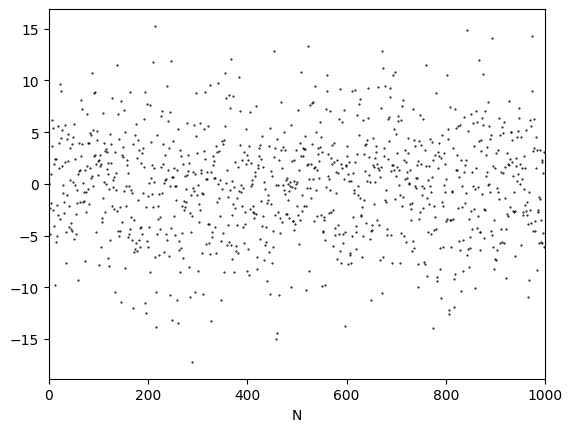

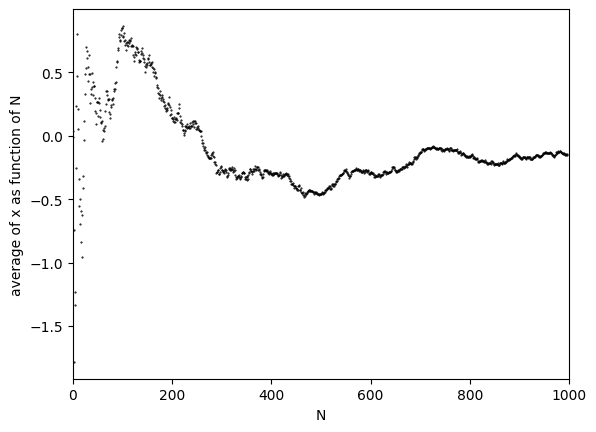

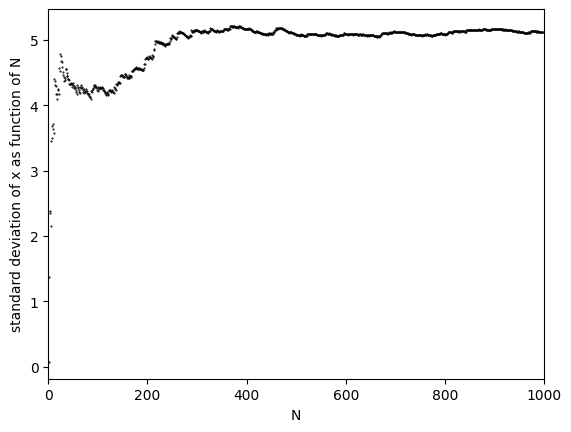

In [6]:
N = 1000
x = np.random.normal(0,5,N)

# Bereken van gemiddelde waarde en standaard deviatie
av_x = np.array([])
std_x = np.array([])
for i in range(1,len(x)-1):
    av_x = np.append(av_x,np.mean(x[:i]))
    std_x = np.append(std_x,np.std(x[:i],ddof=1))

# Plotten van de waarden als functie van N
plt.figure()
plt.plot(x,'k.',markersize=1)
plt.xlabel('N')
plt.ylabel('')
plt.xlim(0,N)
plt.savefig("Figures/noise.png",dpi=300)
plt.show()


plt.figure()
plt.plot(av_x,'k.',ms=1)
plt.xlabel('N')
plt.ylabel('average of x as function of N')
plt.xlim(0,N)
plt.savefig("Figures/noise_average.png", dpi=300)
plt.show()

plt.figure()
plt.plot(std_x,'k.',ms=1)
plt.xlabel('N')
plt.ylabel('standard deviation of x as function of N')
plt.xlim(0,N)
plt.savefig("Figures/noise_sigma.png",dpi=300)
plt.show()



```{figure} Figures/noise.png
---
width: 50%
name: fig:MO:noise
---
Random noise, observe that outliers exist but are not frequent.
```

```{figure} Figures/noise_average.png
---
width: 50%
name: fig:MO:noise_av
---
The average value of noise is increasingly well defined with repeated measurements.

```
```{figure} Figures/noise_sigma.png
---
width: 50%
name: fig:MO:noise_sigm
---
The standard deviation becomes increasingly well defined with repeated measurements.
```

We must be careful here, as {numref}`Figure {number} <fig:MO:repnoise>` shows that a histogram of four repeated measurements of noise always gives a slightly different picture. Each histogram consists of 1000 repeated measurements. So there is even an uncertainty in the uncertainty $\left( \frac{1}{\sqrt{2N-2}}\right )$. The exact way in which we report our values is elaborated in {ref}`MO:std:labels`. 


```{figure} Figures/noise1.png
---
width: 90%
name: fig:MO:repnoise
---
Even 1,000 repeated measurements (of noise) show differences.
```


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
from scipy.stats import norm, poisson
from ipywidgets import interact
import ipywidgets as widgets


In [4]:
# Maken van 1000 random punten

def update(average_value,std_value):

    x = np.random.normal(average_value,std_value,1000)

    # Bereken van gemiddelde waarde en standaard deviatie
    av_x = np.array([])
    std_x = np.array([])
    for i in range(1,len(x)-1):
        av_x = np.append(av_x,np.mean(x[:i]))
        std_x = np.append(std_x,np.std(x[:i],ddof=1))

    # Plotten van de waarden als functie van N
    plt.clf()
    fig, axs = plt.subplots(1,3,figsize=(15, 5))
    axs[0].plot(x,'k.',markersize=1)
    axs[0].set_xlabel('N')
    axs[0].set_ylabel('')

    axs[1].plot(av_x,'k.',ms=1)
    axs[1].set_xlabel('N')
    axs[1].set_ylabel('average of x as function of N')

    axs[2].plot(std_x,'k.',ms=1)
    axs[2].set_xlabel('N')
    axs[2].set_ylabel('standard deviation of x as function of N')

    plt.show()

interact(update, average_value=widgets.FloatSlider(min=-3, max=3, step=.5, value=0),
         std_value=widgets.FloatSlider(min=0, max=10, step=1, value=1))

interactive(children=(FloatSlider(value=0.0, description='average_value', max=3.0, min=-3.0, step=0.5), FloatS…

<function __main__.update(average_value, std_value)>

In [ ]:
# we voeren hier een experiment met 1000 samples 100x uit. Als bovenstaande klopt, dan is de standaard deviatie in het gemiddelde van de verschillende experimenten gelijk aan de onzekerheid in een enkele dataset.


mean_values = np.array([])
N = 100
samples = 1000

for i in range(N):
    dataset = np.random.normal(1.00,0.5,samples) 
    mean_values = np.append(mean_values,np.mean(dataset))
    
print('The standard deviation in the mean of repeated experiments is: ', np.std(mean_values,ddof=1))
print('The uncertainty in a single dataset is: ', np.std(dataset,ddof=1)/np.sqrt(samples))

### Poisson distribution
A second probability distribution that we introduce here is the Poisson distribution. The Poisson distribution is a discrete (as opposed to the normal distribution) probability distribution, which is used to count independent events within a certain time, whereby the events themselves are also based on a normal distribution. Examples of this are radioactive decay, the number of photons that fall on a detector, etc.

The probability of $k$ events within a certain time with an average of $\lambda$ is given by:

$$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}. $$ (eq:Poisson)

The standard deviation in a Poisson distribution is equal to the square root of the mean ($\sigma = \sqrt{\lambda}$).

````{admonition} Example: Poisson
:class: dropdown, tip
An average of 20 people eat at a restaurant every day. What does the probability distribution of the number of people who come to eat look like? \
The probability distribution of the number of visitors is shown in {numref}`Figure {number} <fig:MO:restaurant>` The probability is described by: $P(X = k) = \frac{20^k e^{-20}}{k!}$.

```{figure} Figures/restaurant.png
---
width: 80%
name: fig:MO:restaurant
---
The probability distribution of the number of visitors to the restaurant.
```
````

Both the shape and the function are somewhat similar to those of the Gaussian distribution. However, there are clear differences, particularly for small values of $\lambda$. Furthermore, the number of events is always greater than 0, whereas in a Gaussian distribution, the expected value can also be less than 0.

### Uniform distribution
When you roll a die, the probability of rolling a 1 is the same as rolling a 6. In other words, the probability for any random number is uniformly (discreetly) distributed. Now suppose we are dealing with a continuous, uniform probability distribution, then the probability density function applies:

$$
P(x)= 
\begin{cases}
    \frac{1}{b-a},& \text{if } a<x<b\\
    0,              & \text{elsewhere}
\end{cases}
$$  (eq:uni_verd)

The probability that a point lies between the values $X$ and $X+dX$ (if $X$ lies between $a$ and $b$!) is then given by:

$$
p(X<x<X+dX) = \int_{X}^{X+dX}\frac{1}{b-a}dx
$$

The expected value is simply being calculated by: 

$$ \mu = \frac{a+b}{2} $$ (eq:uni_gem)

and its standard deviation by: 

$$ \sigma = \sqrt{\frac{(b-a)^2}{12}} $$ (eq:uni_std)


#### Monte Carlo simulation
Such a uniform distribution is useful in Monte Carlo simulations, for example. In such a simulation, a large number of random points are generated and then examined to see where they end up. For an integral that cannot be solved analytically, you can still calculate the surface area, namely:

$$ \int_{a}^{b} f(x) dx = \frac{N}{N_{totaal}} \cdot (b-a) \cdot (y_{max} - y_{min}) $$ (eq:unif)

Here, $y_{min}$ and $y_{max}$ are the vertical limits you choose for creating your random points. Of course, these must cover the entire graph!


An example of a Monte Carlo simulation is given in {numref}`Figure {number} <fig:MO:montcarlintegraal>`, in which a simple integral is calculated by determining whether $y<x^2$ applies for 10,000 points. The integral on the domain \[0.5\] is then equal to *the number of points that satisfy this condition divided by the total number of points created times 5 times 25*. In such a Monte Carlo simulation (which is a counting problem), the uncertainty scales with $\frac{1}{\sqrt{N}}$, where $N$ is the number of points that satisfy the condition (so choose the vertical boundaries optimally!).

```{figure} Figures/montecarlopi_square.png
---
width: 50%
name: fig:MO:montcarlintegraal
---
An example of a Monte Carlo simulation for calculating an integral using a uniform distribution of random points.
```

### Chauvenet's criterium 

Repeated measurements lead to a better average. However, in repeated measurements, certain values can deviate significantly from the average. It can be tempting to simply write off a measurement point that deviates significantly from the rest as a measurement error. However, this quickly becomes data manipulation, which is not the intention. You can apply Chauvenet's criterion to see if the measurement point can be removed. Chauvenet's criterion is a rule of thumb (there are other, more complicated methods for determining whether you can remove data points, but we will not discuss them here). Chauvenet's criterion states that a measurement may be removed from the dataset if the probability of this is less than $\frac{1}{2N}$ or $P(X)<\frac{1}{2N}$.

In more detail, this means that you first calculate the mean and standard deviation of your data, *including* the suspicious point. You can then omit a point if it satisfies the following inequality: 

$$ N\cdot P_{out} < 0.5 $$ (eq:criterium)

where

$$P_{out}=2Erf(x_{out},\overline{x},\sigma)$$ (eq:chauvenet)

Here, erf is the error function, the integral of the normal distribution. The result of this integral cannot be calculated algebraically. You can calculate the value for the error function at <https://www.danielsoper.com/statcalc/calculator.aspx?id=53>. Below, we explain how to do this in Python.


If you use Chauvenet's criterion to exclude an outlier, you must always mention this in your report! In addition, you must recalculate the mean and standard deviation after removing the suspect point. After all, this point has a significant effect on your dataset.

```{exercise} Outlier
:class: dropdown
:label: Outlier
Which measurement from series 1b is suspicious? Use Chauvenet's criterion to see if you can exclude this measurement.
```

````{solution} Outlier
:class: dropdown
$P_{out} = 2\cdot \text{Erf}(x = 19,\overline{x} = 25.4,\sigma = 4.0) = 2 \cdot 0.05479929$
 
$N\cdot P_{out} = 0.5479929 > 0.5$. We can not discard the measurement.
````


#### Error function(s)
There are two kinds of error functions, the $\text{erf}(x)$ and the $\text{Erf}(x_{out},\overline{x},\sigma)$ (also called the cdf function). These are defined as: 

$$
\begin{align*}
    \text{erf}(x) &= \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt \\
    \text{Erf}(x, \overline{x}, \sigma_x) &= \frac{1}{2} \left[1 + \text{erf}\left(\frac{x - \overline{x}}{\sqrt{2}\sigma_x}\right)\right]
\end{align*}
$$ (eq:Erf)

A plot of both function is given in {numref}`Figuur {number} <fig:MO:erfplots>`

```{figure} Figures/erfplots.png
---
width: 80%
name: fig:MO:erfplots
---
2 plots, een met de $\text{erf}(x)$ en een met de $\text{Erf}(x_{out},\overline{x},\sigma)$ (rechts), $\overline{x} = 10$ en $\sigma = 5$.
```

Both functions can be found in the `scipy.special.erf` and `scipy.stats.norm.cdf` functions. When using the `Erf` or `scipy.stats.norm.cdf` function (or the site), keep in mind that when investigating an upward *outlier*, the functions will all return a value above 0.5. This means that you must do $P_{out\_new} = 1 - P_{out}$. The final code should therefore be something like this:

In [ ]:
from scipy.stats import norm

#P is the dataset (a numpy array)
x_out = np.max(P) #In this case, could also have been other outliers
x_mean = np.mean(P)
x_std = np.std(P,ddof=1)

#Use the Erf function
Q = norm.cdf(x_out,x_mean,x_std)

In [ ]:
#You could have also defined the Erf on your own

#Check if it is a high 'outlier'
if Q > 0.5:
    Q = (1-Q)

#Use Chauvenets criterion
C =  2 * len(P) * Q

if C < 0.5:
    print('The value can be discarded.')
else:
    print('The value cannot be discarded.')

(MO:std:labels)=
### Measurement uncertainty and significant figures

An important rule regarding significance is that you first determine the number of decimal places of your uncertainty. If you have fewer than $10^3$ measurement points, the uncertainty has one significant digit. You adjust the significance of your result accordingly, so that the last digit has the same value as your uncertainty. You can use powers of 10 or prefixes to clearly represent the number, see table below.

<!-- {#tab:powersof10}. -->

````{admonition} Example: 
:class: dropdown, tip
*Question*: 

Determine the mean value (including its uncertainty) of the measurement serie.
```{list-table}
: header-rows : 1
: name: herhaalde_meting
* - Meting
  - $U$ (V)
* - 1
  - 5.050
* - 2
  - 4.980
* - 3
  - 5.000
* - 4
  - 4.950
* - 5
  - 5.020 
```

*Answer:*

First, we determine the mean value $\mu(U)=\overline{U}=\frac{1}{N}\sum_{i=1}^{N} U_i = 5.000 \mathrm{V}$. \
Then we determine the standard deviation $\sigma(U) = \sqrt{\frac{1}{N-1}\sum_{i=1}^N (U_i-\overline{U})^2} = 0.038078866 \mathrm{V}$.
Finally, we determine the uncertainty in the average value $u(U) = \frac{\sigma(U)} {\sqrt{N}} = 0.017029386 \mathrm{V}$.
We have fewer than $10^3$ measurement points, so we round the uncertainty to 1 decimal place: $u(U) = 0.02 \mathrm{V}$.
The uncertainty has two decimal places, so we adjust our mean accordingly: $\overline{U} = 5.00 \pm 0.02 \mathrm{V}$.
````

There is another important point regarding rounding. If you were to round all fives up, you would introduce a systematic error; you always round up. The agreement is that if the number before the $5$ is even, you round down ($33.45 \rightarrow 33.4$), and if the number before the $5$ is odd, you round up ($33.55 \rightarrow 33.6$). In addition, in some fields it is good practice not to round down the uncertainty, as this prevents underestimating the uncertainty. However, we do not pay attention to this in physics practicals.


**Table:** Powers of 10, including their symbols. 
| power of 10 | $10^{-12}$ | $10^{-9}$ | $10^{-6}$ | $10^{-3}$ | $10^{-2}$ | $10^{-1}$ | $10^1$ | $10^2$ | $10^3$ | $10^6$ | $10^9$ | $10^{12}$ |
|--------------|------------|-----------|-----------|-----------|-----------|-----------|--------|--------|--------|--------|--------|-----------|
| voorvoegsel  | pico       | nano      | micro     | milli     | centi     | deci      | deca   | hecto  | kilo   | mega   | giga   | tera      |
| symbool      | p          | n         | $\mu$     | m         | c         | d         | da     | h      | k      | M      | G      | T         |

For additional information about significant figures, you can watch this [*video*](https://www.youtube.com/watch?v=Gn97hpEkTiM).


## Errorpropagation

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/Qbwikf7TqqI?si=CFzbrJqoov-XOKgS"            
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>

<br>

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/Lb6lhWIxqhg?si=RvI7Vzoc0BWdf0_7"            
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>


You often apply a calculation to your raw data to arrive at an answer to your research question. A small deviation in your measurement can have major consequences for your final answer. That is why it is important to take the impact of uncertainties into account. There are two methods for calculating errors: the functional approach and the calculus approach. The former is more intuitive, but the latter is slightly easier to calculate.

In the theory below, we assume that we apply a function $Z$ to our empirically determined value $x$, whose mean is $\overline{x}$ with an uncertainty $u(x)$.

### Functional approach

With the functional approach, you look at the difference when you evaluate the function at the point that is one uncertainty away from your measuring point. In formula form, this becomes:


$$u(Z) = \frac{Z(\overline{x}+u(x)) - Z(\overline{x} - u(x))}{2}$$ (eq:func)

In many cases, symmetry applies, which means that the above equation can also be interpreted as:

$$u(Z) = Z(\overline{x}+u(x)) - Z(\overline{x})$$ (eq:func_eenvoudig)


```{admonition} Example: 
:class: dropdown, tip
*Question:* 

Calculate the circumference of a circle with a radius of 
$r = 2 \pm 0.1 $ cm

*Answer:* 

$O = 2\pi r = 4.0\pi \approx 12.5664 $ cm\
$u(O) = \frac{O(2+0.1) - O(2-0.1)}{2} = 2\pi\frac{2.1-1.9}{2} \approx 0.628...$cm\
$O = 12.6 \pm 0.6$cm
```

The functional approach is very useful for calculations that you need to repeat. In Python, you first define the function and then calculate the outcome for the variables + uncertainty. See the code below for the example given. This saves you a lot of time and calculations. However, when setting up a new method, the calculus approach gives a better picture of the magnitude of the uncertainties. You can use the calculus approach to dimension your experiment.

In [ ]:
# Functional approach in calculation uncertainty of circumference of a circle
import numpy as np
def omtrek(x,a):
    return 2*np.pi*(x+a)
    
r = 2.0
ur = 0.1

u_omtrek = (omtrek(r,ur)-omtrek(r,-ur))/2
print(u_omtrek)

### Calculus approach
In the calculus method, you use partial derivatives to linearize the effect of an error:

$$u(Z) = |\frac{\partial Z}{\partial x}|u(x)$$ (eq:calc)

A consequence of the linear approach to the error is that this method becomes less accurate as the error increases or the function exhibits strongly non-linear behavior.

```{admonition} Example: 
:class: dropdown, tip
*Vraag:* 

Bepaal de vergelijking voor de onzekerheid in $f(x) = 2x\cos{x}$?

*Antwoord:* 

We gebruiken de calculus approach. Hiertoe bepalen we de afgeleide van $f(x)$ naar $x$.

$$\frac{\partial f(x)}{\partial x} = \cos{x}\frac{\partial (2x)}{\partial x} + 2x\frac{\partial \cos{x}}{\partial x} = 2\cos{x} - 2x\sin{x}$$

Vervolgens passen we de calculus approach toe:

$$u(f) = \frac{\partial f(x)}{\partial x}u(x) =  2(\cos{x} - x\sin{x})u(x)$$
```

### Multiple variables
If your result is a function of multiple independent variables, you add the errors quadratically:

$$u(f(x_1,x_2,\dotsc,x_n))^2 = \sum_{i=1}^n \left(\frac{\partial f(\vec{x})}{\partial x_i}u(x_i)\right)^2$$ (eq:err_prop)

Using the calculus method, it can be deduced that the uncertainty $u(f)$ applies to a function $f(y,x)=cy^nx^m$:

```{math}
:label: eq:afleiding
\left(\frac{u(f)}{f}\right)^2 = \left(\frac{u(c)}{c}\right)^2+n^2\left(\frac{u(y)}{y}\right)^2+m^2\left(\frac{u(x)}{x}\right)^2
```

```{exercise} 
:label: ex-doos
:class: dropdown
Eric weegt een doos. De massa is (56 $\pm$ 2) g. De doos heeft zijden van (3.0 $\pm$ 0.1) cm.

1.  Bereken de zwaartekracht op de doos.

2.  Bereken het volume van de doos.

3.  Bereken de dichtheid van de doos.
```

````{solution} ex-doos
:class: dropdown
1.  $(0.55 \pm 0.02) $ N

2.  $(27 \pm 3)$ cm$^3$

3.  $(2.1 \pm 0.2) $ g/cm$^3$
````

```{admonition} Example: 
:class: dropdown, tip

*Vraag:* 

Bereken de onzekerheid in $g(x,y) = \ln(x)e^{2y}$

*Antwoord:* 

We gebruiken de calculus approach. Hiertoe bepalen we de partiële afgeleides van $g(x)$ naar $x$ en $y$.

$$\begin{aligned}
    \frac{\partial g(x,y)}{\partial x} &= \frac{1}{x}e^{2y}\\
    \frac{\partial g(x,y)}{\partial y} &= 2\ln(x)e^{2y}
\end{aligned}$$ 

Vervolgens tellen we de onzekerheden kwadratisch op:

$$u(g)^2 = \sum_{i=1}^n \left(\frac{\partial g(x_i)}{\partial x_i}u(x_i)\right)^2 =  \left(\frac{1}{x}e^{2y}u(x)\right)^2 + \left(2\ln(x)e^{2y}u(y)^2\right)^2$$
```

```{tip} Standaard functies 
:class: dropdown
**Tabel:** Overzicht van veelgebruikte functies en bijbehorende onzekerheden. 
>| Functie $Z(x,y)$ | $\frac{dZ}{dx}$ | Onzekerheid $u(Z)$                                                  |
>|------------------|-----------------|--------------------------------------------------------------------|
>| $x + y$          | 1               | $\sqrt{u(x)^2+u(y)^2}$                                             |
>| $x \cdot y$      | y               | $\sqrt{(y\cdot u(x))^2+(x\cdot u(y))^2}$                           |
>| $x^n$            | $n\cdot x^{n-1}$| $\vert n\cdot x^{n-1}\cdot u(x)\vert$ or $\vert\frac{u(Z)}{Z}\vert = \vert n\frac{u(x)}{x}\vert$ |
>| $e^{cx}$         | $ce^{cx}$       | $ce^x \cdot(cx)$ or $Z \cdot u(x)$                                   |
>| $n^x$            | $n^x \ln{n}$    | $n^x \ln{n} \cdot u(x)$                                             |
>| $\ln{x}$         | $\frac{1}{x}$   | $\frac{u(x)}{x}$                                                   |
>| $\sin{x}$        | $\cos{x}$       | $\vert\cos{x}\vert\cdot u(x)$                                               |
>| $\cos{x}$        | $-\sin{x}$      | $\vert\sin{x}\vert\cdot u(x)$                                               |
>| $\tan{x}$        | $1+\tan^2{x}$   | $(1+\tan^2{x})\cdot u(x)$ or $(1+Z^2) \cdot u(x)$                    |
```

```{tip} Rekenregels
:class: dropdown
>**Reminder:**
>
>| Functie                | Afgeleide                          |
>|------------------------|------------------------------------|
>| $f(x)\cdot g(x)$       | $f'(x)g(x) + f(x)g'(x)$            |
>| $\frac{f(x)}{g(x)}$    | $\frac{g(x)f'(x)-f(x)g'(x)}{g'(x)^2}$ |
>| $f(g(x))$              | $f'(g(x))g'(x)$                    |
```

Please note that if you have two values **A** and **B** that are close to each other and you subtract them from each other (**A**-**B**), your error may well be much greater than the difference between those two values. In such cases, you will need to look for alternative measurement methods that yield a smaller relative uncertainty. See below for an example for inspiration.


````{admonition} Example: verkleinen meetonzekerheid:
:class: dropdown, tip

For an experiment, we want to determine the frequency difference $\Delta f$ between two tones $f_0$ and $f_1$. After a measurement, it turns out that $f_0 = (1250 \pm 3)$ Hz and $f_1 = (1248 \pm 4)$ Hz. The difference (including uncertainty) is therefore $\Delta f = (2 \pm 5)$ Hz (check).

When subtracting values that are close together, there is a chance that the uncertainty is greater than the determined value itself. We can therefore hardly draw any valid conclusions. In such situations, it is necessary to consider alternative ways of measuring the same thing. In this case, this can be done, for example, by using the physical phenomenon of beat. By determining the oscillation period, you can easily determine the frequency difference. 

```{figure} Figures/freqverschil.png
---
width: 80%
name: fig:MO:freqverschil
---
Tijdsafhankelijke meting van afzonderlijke signalen.
```

```{figure} Figures/freqverschil_som.png
---
width: 80%
name: fig:MO:alternatief
---
Een alternatieve methode om het frequentieverschil van twee signalen te bepalen. Som van beide signalen. Het frequentieverschil is twee keer de frequentie van het *omhulsel* van de som. </figcaption>
```
````

```{exercise}
:label: ex:lamp
:class: dropdown

De tabel hieronder weergeeft metingen van het voltage over en de stroom door een lamp.

**Tabel**: Meting aan een lamp.
| $U$(V) | $u(U)$(V) | $I$(mA) | $u(I)$(mA) |
|--------|-----------|---------|------------|
|  6.0   |    0.2    |   0.25  |    0.1     |
    1.  Bepaal het vermogen dat de lamp opneemt.

    2.  Bepaal de weerstand van de lamp.

    3.  Als je het voltage òf de stroom nauwkeuriger zou kunnen meten, welke zou je dan kiezen en waarom?
```

````{solution} ex:lamp
:class: dropdown
1.  $P = (1.5 \pm 0.6\cdot 10^{-3})$ W

2.  $R = (2.4 \pm 1\cdot 10^4)  \Omega$

3.  De stroom, want die heeft de grootste relatieve onzekerheid
````

```{exercise}
:label: ex:Z
:class: dropdown
In de tabel hieronder zijn de waarden en onzekerheden voor variabelen $A$, $B$, en $C$ gegeven. Bereken de waarde en onzekerheden van $Z$ voor de onderstaande gevallen. 

**Tabel**: Drie variabelen en hun onzekerheden.
| $A$   | $u(A)$ | $B$   | $u(B)$ | $C$   | $u(C)$ |
|-------|--------|-------|--------|-------|--------|
|  5.0  |  0.1   |  500  |   2    |   1   |  0.1   |

1.  $Z = \frac{A}{BC^2}$

2.  $Z = \frac{A}{BC^4}$

3.  $Z = C\sqrt{AB}$
```

````{solution} ex:Z
:class: dropdown
1.  $Z = 0.010 \pm 0.002$

2.  $Z = 0.010 \pm 0.004$

3.  $Z = 50 \pm 5$
````

### Dimensioneren
One advantage of the Calculus method over the Functional Approach is that you can dimension your experiment: based on predefined criteria, you can specify how large the experiment should be, what characteristics it should have, and where most of the time and attention should be focused in order for it to meet the set criteria. The easiest way to explain this is with an example.


```{admonition} Example: 
:class: dropdown, tip
You want to use a mass-spring system to accurately determine the mass of 10 different weights. The manufacturer states that the weights have a mass of (50 ± 3) g. However, you want to know the exact mass of each weight, accurate to the nearest gram. The maximum relative uncertainty is therefore 2%. What does the experiment look like?

The mass of the mass-spring system is calculated as follows: 

$$m = \frac{CT^2}{4\pi^2}$$

De onzekerheid in de massa wordt daarmee gegeven door:

$$\left ( \frac{u(m)}{m} \right )^2 = 4\left ( \frac{u(T)}{T} \right )^2+\left ( \frac{u(C)}{C} \right )^2$$

De massa is hier de massa van het gewichtje aan de veer $m_w$ en een onbekend deel van de massa van de veer $m_C$ zelf:

$$m = M_w + m_C$$

De onzekerheid in de massa van het gewichtje wordt daarmee:

$$u(M_w)^2 =  u(m)^2 + u(m_C)^2 = \left (  4\left ( \frac{u(T)}{T} \right )^2+\left ( \frac{u(C)}{C} \right )^2 \right ) m^2 + u(m_C)^2$$

Based on this comparison and the requirement that $u(M_w)^2 < 1$g and the knowledge that $m\approx50$g, the experiment can be further dimensioned. Since the spring constant $C$ and the contribution of the mass of the spring $m_C$ can be determined in advance, the number of periods to be determined follows from this equation.
This knowledge is applied in particular in the open research at the end  of this course and in the course *Design Engineering for Physicists* (DEF) in the following semester. Whereas in the practical course you work towards carrying out the experiment, in DEF you would set requirements for the spring: how accurately must the spring be made (i.e., what is the tolerance you require from the spring manufacturer).
```



## Fitting

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/wbQ7ra725ys?si=_Fc7_2KSS1QI4V2b"            
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>


We often measure a quantity as a function of another quantity, for example, the extension of a spring as a function of the spring load or the period of oscillation as a function of the length of the pendulum. The purpose of this can vary. For example, we may ask ourselves: *How (according to which functional relationship) does the elongation depend on the load?* Or: *What is the spring constant of the spring?* We then assume a certain relationship and use that relationship to determine the values of parameters. In the first case, we refer to this as modeling, and in the second case, as adjusting or “fitting.” In statistics, the second case is known as a regression problem. We will discuss this in more detail below.

Fitting is a procedure that attempts to find a mathematical relationship in a number of (measurement) points. We are then looking for a relationship $F(x)$ that describes the measurement points $M(x)$ in such a way that:

$$F(x) - M(x)\approx 0$$ (eq:resid)

First, you need to choose a type of relationship. Examples include a linear fit, a polynomial, sine, etc. In the fitting procedure itself, the parameters of this relationship are chosen so that they best match the data. For example, if a second-order polynomial is being fitted, you look for the combination of $a$, $b$, and $c$ that ensures that the curve $a + bx + cx^2$ fits your measurement points as closely as possible.

A commonly used method for determining the *goodness* of a fit is the *least-squares* method. In this method, the sum of the squared distances from the measurement points to the fit is minimized. To do this, we first define the distance between the measurement point and the fit:

$$R_i = M_i - F_i$$ (eq:resid2)

This distance is also referred to as the residue, which we will discuss in more detail later. The total sum of the absolute distances must be as small as possible:

$$\chi^2=\sum R_i^2$$ (eq:chi2a)

```{figure} Figures/least_squar_fit.png
---
width: 80%
name: fig:least_square_fitting
---
Het idee van een least-square methode is dat het oppervlak zo klein mogelijk gemaakt wordt
```

You can see when $\chi^2$ is as small as possible by playing with the sliders below. 


<iframe src="my_plot.html" width="900" height="500" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In the above case, we assume that the value of the independent variable has been determined with sufficient accuracy and precision. There are other techniques that take into account the deviation in the dependent variable. We can also look again at the influence of measurement uncertainty in determining the best fit.


### Weighted fit
Just as a weighted average takes into account the uncertainty in the measurement, you can use a weighted fit for a function fit. This allows you to take into account the uncertainty in the dependent variable (there is also a technique that takes into account the uncertainty in both the independent and dependent variables, but we will not discuss that here).

For a weighted fit, the smallest value for $\chi^2$ is considered, taking the uncertainty into account:

$$\chi^2 = \sum \frac{(M_i-F_i)^2 }{u(M_i)^2} $$ (eq:chi2)


### Other fit types

With a least-squares fit, we try to minimize the residual (squared). This works particularly well under the assumption that the uncertainty lies in the dependent variable. We are therefore able to set the independent variable ourselves, or reduce the uncertainty to such an extent that it can be neglected in relation to the uncertainty in the dependent variable. However, the least-squares method is not the only method. There is also, for example, the ‘orthogonal distance regression’ method, or smallest distance method. The method is visualized in {numref}`Figure {number} <fig:ODR>`. We will not provide the further mathematical elaboration here, but how the method can be implemented can be found in this [source](https://docs.scipy.org/doc/scipy/reference/odr.html).


```{figure} Figures/ODR.JPG
---
width: 80%
name: fig:ODR
---
Another fitting method is ODR, which minimizes the distance to the fitting line.
```

## Residual analysis

<div style="display: flex; justify-content: center;">
    <div style="position: relative; width: 70%; height: 0; padding-bottom: 56.25%;">
        <iframe
            src="https://www.youtube.com/embed/fyUT-D-NU8I?si=twzAlDQ4uYGUQYdu"            
            style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"
            frameborder="0"
            allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
            allowfullscreen
        ></iframe>
    </div>
</div>

In one of the previous sections, we discussed that a physical measurement ($M(x)$) can be described as the sum of the physical value ($G(x)$) + noise ($s$). A function fit ($F(x)$) is performed based on the measurements. To check that we have a good fit, we need to look at the noise. We would get this if we subtract the fit function from the measurement: 

$$ R = M(x) - F(x) \stackrel{?}{=} s $$ (eq:residuals)

The initial analysis is performed by plotting the noise $s$ as a function of the independent variable $x$. If there is a pattern in this, for example a rising line, a sinusoidal signal, or all noise points above 0, see {numref}`Figure {number} <fig:MO:three_graphs>`, then there is a good chance that a better function $F(x)$ can be found that describes the physical value $G(x)$.

```{figure} Figures/three_graphs.png
---
width: 90%
name: fig:MO:three_graphs
---
(a) $M(x) = 2x + 0.05 $, (b) $M(x) = 2x + 0.1x$ en $(c) M(x) = 2x + 0.05sin(3x)$. 
In elk van de metingen zit een 'verborgen' singaal dat zichtbaar wordt bij analyse van de residuals. Voor alle figuren is er een lijn $F(x) = 2x$ gefit.
```

The second analysis of the residue is based on a histogram. If, based on the experiment, you expect the noise to be normally distributed, then the histogram will be a normally distributed function. You can also apply a function fit to this noise signal, whereby we expect the mean to be 0 and the standard deviation to be determinable.

### Linearization

When experimenting, the goal is often to discover the relationship between two variables. In many cases, this relationship is not linear, for example between the swing time and length of a pendulum. In such cases, it is useful to linearize the graphs. Firstly, this makes it easier to see deviations, and secondly, it also makes fitting easier.

````{admonition} Example:
:class: dropdown, tip
We want to determine the value of the acceleration due to gravity $g$. To do this, we take measurements between the period $T$ and the length $L$ of a pendulum.

According to theory, the relationship between the period and length is as follows: $T = 2\pi\sqrt{\frac{L}{g}}$
If we square both sides of the equation, we get:  $T^2 = 4\pi^2 \frac{L}{g}.$
By plotting $T^2$ on the y-axis as a function of $L$, we have linearized the function, and we can better detect systematic errors.

```{figure} Figures/linearisatie1.png
---
width: 80%
name: fig:MO:linearisatie
---
Metingen van de slingertijd als functie van de slingerlengte. Ruwe data geplot, er is een wortelverband zichtbaar.
```

```{figure} Figures/linearisatie2.png
---
width: 80%
name: fig:MO:linearisatie1
---
Gelineariseerde data uit {numref}`Figuur {number} <fig:MO:linearisatie>` door $T^2$ uit te zetten tegen $L$. Een eerste order polynoom $T^2(L)=aL + b$ is gefit met coëfficiënten $a = (4.05 \pm0.01)$ s$^2$/m en $b = (0.015 \pm 0.09)$ s$^2$
```
````

### Agreement analysis

One of the most important reasons for determining uncertainty is that you want to compare results with each other or with theoretical predictions systematically and quantitatively, and thus determine the extent to which the values differ from each other. The question then is: ‘To what extent do the empirically found values correspond with \...’.

Suppose we want to compare two values $a$ and $b$, each with their own uncertainty $u(a)$ and $u(b)$. Then we first want to look at the
difference between these two values: $v = a- b$. Based on the calculus approach, the uncertainty in $v$ is given by $u(v) = \sqrt{u(a)^2 + u(b)^2}$. The agreement now is that two values are inconsistent with each other (in a scientific sense, they do not correspond sufficiently with each other) if the following applies:

$$\lvert v \rvert = \lvert a - b \rvert > 2\sqrt{u(a)^2 + u(b)^2} = 2u(v)$$ (eq:agreement)

When determining physical constants, the uncertainty is often so small that it is negligible compared to other uncertainties. Please note! You could argue that if your measurement uncertainty is large enough, the values will never be contradictory. However, when the uncertainty is relatively large compared to the determined value, the values found have little scientific value.


## Great examples of ugly graphs

There are many ways in which you can present your data poorly. There are only a few ways in which you can do it well. The most important thing when creating a graph is that it is clear and that it is obvious to the reader what they should be looking at.

{numref}`Figure {number} <fig:MO:badgraph>` is a good example of a bad graph. First of all, the trend is not visible. There is one point that is well above the others, but are the values for $r>11$ equal to 0 or not? In addition, there are far too many numbers (ticks) on the horizontal axis. The scale for the horizontal axis is also poorly chosen. Furthermore, we are missing what is actually presented on the horizontal and vertical axes.


```{figure} Figures/slechtegrafiek.png
---
width: 50%
name: fig:MO:slechtegrafiek
---
A great example of an ugly graph
```
{numref}`Figuur {number} <fig:MO:beteregrafiek>` presents the same data. The differences may be clear, the data are displayed on a log-log scale, and a trend line shows the relationship between force and distance. The number of ticks is limited. The graph could be further improved by including the measurement uncertainty.
```{figure} Figures/beteregrafiek.png
---
width: 50%
name: fig:MO:beteregrafiek
---
Een verbeterde versie van de grafiek
```


## Further reading

Some external sources on the use of data and measurement uncertainty:\
[Guide to the expression of uncertainty in measurement](https://www.bipm.org/utils/common/documents/jcgm/JCGM_100_2008_E.pdf)\
[Liegen met cijfers](https://www.libris.nl/boek/?authortitle=darrell-huff/liegen-met-cijfers--9789492790156)\
[Het bestverkochte boek ooit](https://kiosk.decorrespondent.nl/products/het-bestverkochte-boek-ooit-met-deze-titel-sanne-blauw-boek)


## Exercises
```{exercise}
:label: ex-unc
:class: dropdown
In de tabel hieronder zijn de waardes van $a$ en $x$ gegeven.

|   a             |     $u(a)$      |    x             |     $u(x)$      |
|-----------------|-----------------|-----------------|-----------------|
| $5\cdot10^{-8}$ | $1\cdot10^{-9}$ | $5\cdot10^{-3}$ | $1\cdot10^{-3}$ |

1.  Bepaal de waarde en onzekerheid van $F = a \cdot x^{-4}$.

2.  Doe hetzelfde als in de vorige opgave, maar neem nu
    $u(a)  = 1 \cdot 10^{-9}$ en $u(x)  = 1 \cdot 10^{-10}$. Wat valt je op?

3.  Houd nu $u(a)$ constant, en neem $u(x) = 1\cdot 10^{-3}$ en $u(x) = 1\cdot 10^{4}$. Wat valt je op?

4.  Vergelijk je antwoorden bij vraag b) en c). Waarom schaalt de fout in $F$ lineair met de fout in $a$ maar niet met $x$?
```

````{solution} ex-unc
:class: dropdown
1.  $F = (5 \pm 6) \cdot 10^1$

2.  $F = (50.0 \pm 1.6)$

3.  -

4. -
````

```{exercise}
:label: ex-verg
:class: dropdown
Leid vergelijking {eq}`eq:afleiding` af.
```

````{solution} ex-verg
:class: dropdown
Pas hier eerst de calculus methode toe, en deel dan door $f$.
````

```{exercise}
:label: ex-afstand
:class: dropdown
Een afstand $s$ wordt gemeten als het verschil van twee afstanden $p$ en $q$. De posities van $p$ en $q$ zijn: $p = (30.0\pm0.9)$ km en $q = (10.0\pm0.1)$ km. Bereken de afstand $s$ en de bijbehorende onnauwkeurigheid $u(s)$. Noteer het resultaat op de juiste wijze.
```

````{solution} ex-afstand
:class: dropdown
$s = (20.0 \pm 0.9) \text{km}$
````

```{exercise}
:label: ex-balk
:class: dropdown
Beschouw een balk met lengte $L=(7.5\pm0.1)$ m, breedte $B=(12.5\pm0.2)$ cm en hoogte $H=(15.0\pm0.3)$ cm. Het oppervlakte $A$ wordt gegeven door $B \cdot H$. Bepaal de onnauwkeurigheden $u(A)$ en $u(V)$.
```

````{solution} ex-balk
:class: dropdown
$u(A) = \sqrt{(\frac{u(B)}{B})}^2+{(\frac{u(H)}{H})^2} \cdot B \cdot H= \sqrt{(\frac{0.2}{12.5})^2+{(\frac{0.3}{15.0})}^2} \cdot 12.5 \cdot 15 = 5 \space \text{cm}^2$\
    $u(V) = \sqrt{{\left(\frac{u(B)}{B}\right)}^2+{\left(\frac{u(H)}{H}\right)}^2+{\left(\frac{u(L)}{L}\right)}^2} \cdot B \cdot H \cdot L= 0.004 \space \text{m}^3$
````

```{exercise}
:label: ex-pend
:class: dropdown
Met behulp van een pendulum wordt de valversnelling $g$ bepaald. De slingertijd is $T = (1.60\pm0.03)$ s en de lengte van de slinger is $L = (64.0\pm0.8)$ cm.

1.  Geef het verband tussen de slingertijd en de slingerlengte.

2.  Leid uit dit verband een formule af voor de valversnelling $g$.

3.  Geef de onnauwkeurigheidsformule voor $u(g)$.

4.  Bereken $g$ en $u(g)$ en noteer de resultaten op de juiste wijze.

5.  Welke variabele heeft de grootste invloed op de onnauwkeurigheid?
```

````{solution} ex-pend
:class: dropdown
1.  $T = 2 \pi \sqrt{\frac{L}{g}}$

2.  $g = \frac{4 \pi ^2 L}{T^2}$

3.  $\left(\frac{u(g)}{g}\right)^2 = \left(\frac{u(L)}{L}\right)^2 + 4 \left(\frac{u(T)}{T}\right)^2$

4.  $g = 9.8696 \space \text{m/s}^2$\
    $u(g) = 0.39 \space \text{m/s}^2$\
    dus $g = (9.9 \space \pm 0.4)\text{m/s}^2$

5.  $T$, factor 4x zo groot op de berekening van $u(g)$. 10x zo groot in precieze berekening.
````

```{exercise}
:label: ex-G
:class: dropdown
De relatie tussen grootheid $G$ hangt af van de gemeten grootheden $x$ en $y$ wordt gegeven door $G(x,y)=\frac{1}{2} x y^{3} + 5 x^{2} y$. De onnauwkeurigheden in $x$ en $y$ zijn respectievelijk $u(x)$ en $u(y)$. Bepaal de onnauwkeurigheidsformule voor $u(G)$.
```

````{solution} ex-G
:class: dropdown
$G(x,y)=\frac{1}{2} x y^{3} + 5 x^{2} y = G_1 + G_2$\
$u(G) = \sqrt{u(G_1)^2+u(G_2)^2}$\
$\left({\frac{u(G_1)}{G_1}}\right)^2 = \left({\frac{u(x)}{x}}\right)^2 + 9 \left({\frac{u(y)}{y}}\right)^2$\
$\left({\frac{u(G_2)}{G_2}}\right)^2 = 4 \left(\frac{u(x)}{x}\right)^2 + \left({\frac{u(y)}{y}}\right)^2$
````

```{exercise}
:label: ex-bol
:class: dropdown
Beschouw een bol met straal $R=(3.02 \pm 0.06)$ m. Bepaal het oppervlak $A$ en het volume $V$ met bijbehorende (relatieve) onnauwkeurigheden.
```

````{solution} ex-bol
:class: dropdown
$A = 4 \pi r ^2 = 114.61 \space \text{m}^2$\
$u(A) = \sqrt{4 \left(\frac{u(r)}{r}\right)^2} \cdot A = 5 \space \text{m}^2$\
$A = (115 \pm 5)$ m$^2$ $V = \frac{4}{3} \pi r ^3 = 115.37\space \text{m}^3$\
$u(V) = \sqrt{9 (\frac{u(r)}{r})^2} \cdot V = 7 \space \text{m}^3$\
$V = (115 \pm 7)\space \text{m}^3$
````

```{exercise}
:label: ex-sin
:class: dropdown
Beschouw $f(x)=2\sin{x}$, waarbij $x$ een gemeten grootheid is met onnauwkeurigheid $u(x)$. Leid een formule af voor de onnauwkeurigheid $u(f)$.
```

````{solution} ex-sin
:class: dropdown
$u(f) = |\frac{\partial f}{\partial x}| \cdot u(x) = |\frac{\partial 2\sin(x)}{\partial x}| \cdot u(x) = 2|\cos(x)| \cdot u(x)$
````

```{exercise}
:label: ex-relatie
:class: dropdown
Hoe kan je de onderstaande relaties (1-4) lineariseren, zodat je ze als rechte lijn $y = mx + c$ kunt plotten? Geef de uitdrukking voor de helling $m$, en het snijpunt $c$.

1.  $V = aU^2$

2.  $V = a\sqrt{U}$

3.  $V = a \exp{(-bU)}$

4.  $\frac{1}{U} + \frac{1}{V} = \frac{1}{a}$
```

````{solution} ex-relatie
:class: dropdown
1.  $y$-as: $\sqrt{V}$, $x$-as: $U$. m: $\sqrt{a}$, c: 0

2.  $y$-as: $V^2$, $x$-as: $U$. m: $a^2$, c: 0

3.  $y$-as: $\ln{V}$, $x$-as: $U$. m: $-b$, c: 0

4.  $y$-as: $\frac{1}{V}$, $x$-as: $\frac{1}{U}$. m: $-1$, c:
    $\frac{1}{a}$

5.  $\frac{1}{U} + \frac{1}{V} = \frac{1}{a}$
````